In [5]:
import elevation

# clip the SRTM1 30m DEM of Rome and save it to Rome-DEM.tif
elevation.clip(
    bounds=(
        127.35953075456467,
        36.36306752736285,
        127.36624087402176,
        36.37701626640067,
    ),
    output="Rome-DEM.tif",
)
# # clean up stale temporary files and fix the cache in the event of a server error
elevation.clean()

make: Entering directory '/home/jack/.cache/elevation/SRTM1'
make: Nothing to be done for 'download'.
make: Leaving directory '/home/jack/.cache/elevation/SRTM1'
make: Entering directory '/home/jack/.cache/elevation/SRTM1'
make: Nothing to be done for 'all'.
make: Leaving directory '/home/jack/.cache/elevation/SRTM1'
make: Entering directory '/home/jack/.cache/elevation/SRTM1'
cp SRTM1.vrt SRTM1.2b41994d431241fc898e7006df5daade.vrt
make: Leaving directory '/home/jack/.cache/elevation/SRTM1'
make: Entering directory '/home/jack/.cache/elevation/SRTM1'
gdal_translate -q -co TILED=YES -co COMPRESS=DEFLATE -co ZLEVEL=9 -co PREDICTOR=2 -projwin 127.35953075456467 36.37701626640067 127.36624087402176 36.36306752736285 SRTM1.2b41994d431241fc898e7006df5daade.vrt Rome-DEM.tif
rm -f SRTM1.2b41994d431241fc898e7006df5daade.vrt
make: Leaving directory '/home/jack/.cache/elevation/SRTM1'
make: Entering directory '/home/jack/.cache/elevation/SRTM1'
find cache -size 0 -name "*.tif" -delete
rm -f SRTM1

In [6]:
import cv2 as cv
img = cv.imread('/home/jack/.cache/elevation/SRTM1/Rome-DEM.tif',cv.IMREAD_GRAYSCALE)

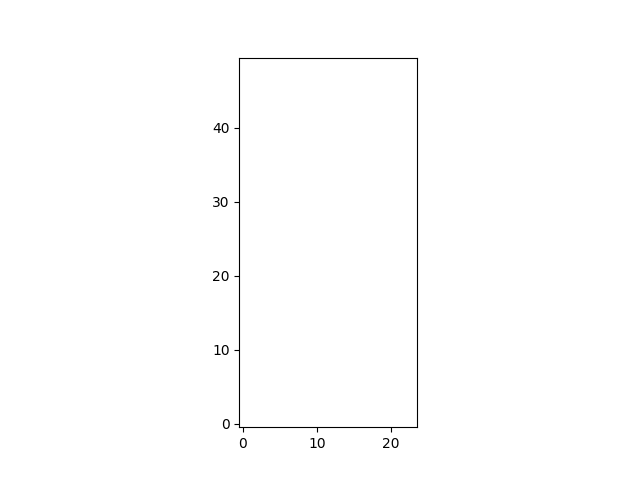

In [7]:
import matplotlib.pyplot as plt
plt.close('all')
plt.imshow(img, cmap='gray_r',origin='lower')
plt.show()

In [ ]:
img.shape

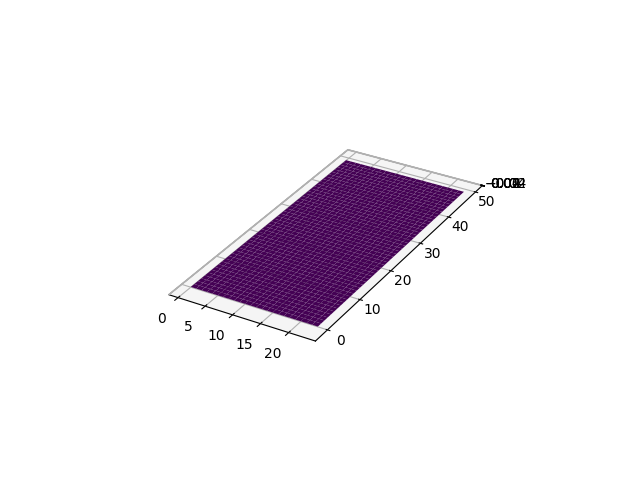

In [8]:
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib widget

# # Set up grid and test data
# nx, ny = 256, 1024
# x = range(nx)
# y = range(ny)

# data = numpy.random.random((nx, ny))
data = img
x = range(data.shape[1])
y = range(data.shape[0])

hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')

X, Y = numpy.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D
ha.plot_surface(X, Y, data, cmap='viridis')
# set 3 axis the same scale
ha.set_aspect('equal')
plt.show()


In [ ]:
from srtm import Srtm1HeightMapCollection
import os
os.environ['SRTM1_DIR'] = '/home/jack/.cache/elevation/SRTM1'
value = os.getenv('SRTM1_DIR')

print(value)
srtm1_data = Srtm1HeightMapCollection()
srtm1_data.get_altitude(latitude=36.36306752736285,
                        longitude=127.36003075456467)


In [ ]:
from srtm import Srtm3HeightMapCollection
import os
os.environ['SRTM3_DIR'] = '/home/jack/Documents/verilog/ASIC/PDR/IOHandler/Rome-30m-DEM.tif'
value = os.getenv('SRTM3_DIR')

print(value)

# SRTM3 - 90m resolution
srtm3_data = Srtm3HeightMapCollection()
srtm3_data.get_altitude(latitude=41.8 , longitude=12.35)
# Srtm3HeightMapCollection().get_elevation_profile(40.123, -7.456, 40.129, -7.460)


In [ ]:
dir(elevation)


In [ ]:
from elevation import cli

cli.selfcheck()

In [ ]:
import requests
import json
def get_elevation_path(start_coord, end_coord, samples, api_key):
    path = f"{start_coord[0]},{start_coord[1]}|{end_coord[0]},{end_coord[1]}"
    url = f"https://maps.googleapis.com/maps/api/elevation/json?path={path}&samples={samples}&key={api_key}"
    response = requests.get(url)
    data = json.loads(response.text)
    if data['status'] == 'OK':
        elevations = [result['elevation'] for result in data['results']]
        return elevations

# Replace 'YOUR_API_KEY' with your actual Google API key
api_key = json.load(open('key.json'))['googlemap']
start_coord = (37.5665, 126.9780)  # Coordinates for Seoul
end_coord = (35.6895, 139.6917)  # Coordinates for Tokyo
samples = 10
elevations = get_elevation_path(start_coord, end_coord, samples, api_key)
for i, elevation in enumerate(elevations):
    print(f'The elevation of sample point {i+1} is {elevation} meters.')
